In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


#### Importing data and setting up file accessing path

In [2]:

def read_folder(folder_path):
    dataframes = {}
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            file_name_no_ext, file_extension = os.path.splitext(file_name)
            if file_extension == '.csv':
                df = pd.read_csv(file_path)
            elif file_extension in ['.xls', '.xlsx']:
                df = pd.read_excel(file_path)
            else:
                continue # ignore files with unsupported extensions
            dataframes[file_name_no_ext] = df
    return dataframes


In [7]:

csv_files = [f for f in os.listdir(folder_path) if f.endswith(('.xlsx','.csv'))]
csv_files

['WuXiaShadowRate.xlsx',
 'DFF.csv',
 'INDPRO.csv',
 'WSHOSHO.csv',
 'CPIAUCSL.csv']

In [4]:
folder_path = '/Users/unmeshgupta/Desktop/QE'
dataframes = read_folder(folder_path)


In [9]:
# DATAFRAMEs representing 

dff = dataframes['DFF']
ipi = dataframes['INDPRO']
sho = dataframes['WSHOSHO']
cpi = dataframes['CPIAUCSL']
shadow_rate = dataframes['WuXiaShadowRate']

print(dff.columns)
print(ipi.columns)
print(sho.columns)
print(cpi.columns)
print(shadow_rate.columns)


Index(['DATE', 'DFF'], dtype='object')
Index(['DATE', 'INDPRO'], dtype='object')
Index(['DATE', 'WSHOSHO'], dtype='object')
Index(['DATE', 'CPIAUCSL'], dtype='object')
Index(['date',
       'Effective federal funds rate (% p.a.), last business day of month',
       'Wu-Xia shadow federal funds rate (last business day of month)'],
      dtype='object')


In [25]:
print(dff.info())
print(ipi.info())
print(sho.info())
print(cpi.info())
print(shadow_rate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5845 non-null   datetime64[ns]
 1   DFF     5845 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 91.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    193 non-null    object 
 1   INDPRO  193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     835 non-null    object 
 1   WSHOSHO  835 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.2+ KB
None
<class 'pandas.core.frame.Data

#### Pre-Processing 

In [26]:
# Wu-Xia shadow federal funds rate column names are irregular, renaming convention in line with literature review 

column_names = {
    'Effective federal funds rate (% p.a.), last business day of month': 'ffr',
    'Wu-Xia shadow federal funds rate (last business day of month)': 'shadow_rate'
}

# use the rename method to rename the columns and let go of null values in shadow, our point of interest in this analysis
shadow_rate = dataframes['WuXiaShadowRate']
shadow_rate = shadow_rate.rename(columns=column_names)
shadow_rate = shadow_rate[shadow_rate['shadow_rate'].notna()]



# changing DATE columns for dff,ipi,sho,cpi to datetime for date parsing later 

def pre_process(df):
    
    df = df.rename(columns={'DATE': 'date'})
    df['date'] = pd.to_datetime(df['date'])
    return df

 
dff = pre_process(dff)
ipi = pre_process(ipi)
sho = pre_process(sho)
cpi = pre_process(cpi)


In [52]:
def plot_lineplot(df):
    df_melt = pd.melt(df, id_vars='date', var_name='interest', value_name='value')
    sns.set(style='ticks', palette='dark', rc={'lines.linestyle': '--'})
    return sns.lineplot(x='date', y='value', hue='interest', ci='sd', data=df_melt, marker='o', markersize=3, linewidth=2, alpha=0.8)


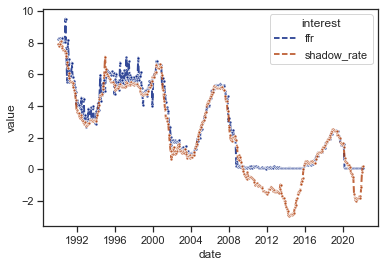

In [56]:
plot_lineplot(shadow_rate)

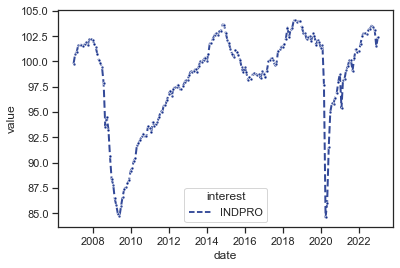

In [57]:
plot_lineplot(ipi)


In [30]:
#### Sample data for analysis 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 360 to 745
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         386 non-null    datetime64[ns]
 1   ffr          386 non-null    float64       
 2   shadow_rate  386 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 12.1 KB


In [ ]:
start_date = '2007-01-01'
end_date = '2022-12-01'

date_range = pd.date_range(start=start_date, end=end_date, freq='M')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

In [ ]:
mask = (df['date'].isin(date_range))
filtered_df = df[mask]
filtered_df